<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 143.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 173.9 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 186.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 165.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 152.4 MB/s eta 0:00:00


In [3]:
!pip install seaborn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [4]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-22 06:56:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.8MB/s    in 2.5s    

2025-04-22 06:56:21 (59.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data


In [6]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [7]:
pd.set_option('display.max_columns', None)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



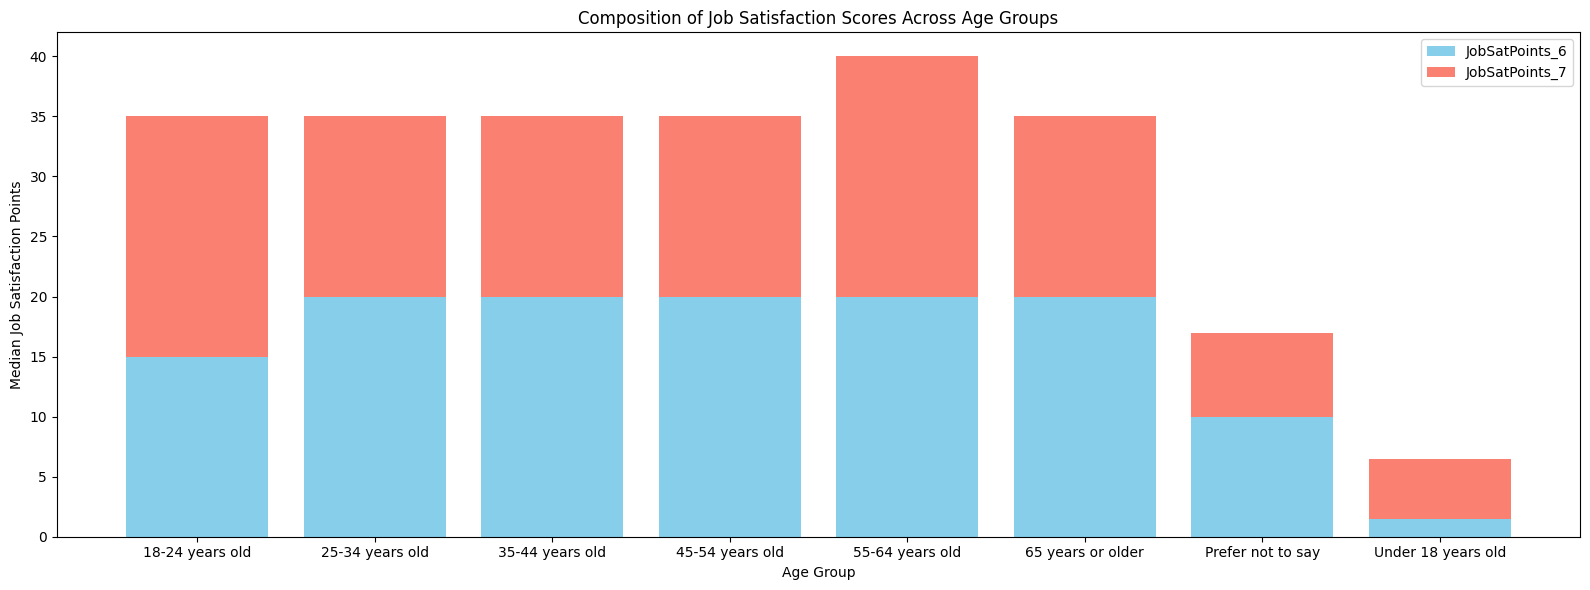

In [8]:
##Write your code here
df_plot = df[['Age','JobSatPoints_6','JobSatPoints_7']].dropna()
grouped = df_plot.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Plotting
plt.figure(figsize=(16, 6))
plt.bar(grouped['Age'], grouped['JobSatPoints_6'], label='JobSatPoints_6', color='skyblue')
plt.bar(grouped['Age'], grouped['JobSatPoints_7'], bottom=grouped['JobSatPoints_6'], label='JobSatPoints_7', color='salmon')

plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.title('Composition of Job Satisfaction Scores Across Age Groups')
plt.legend()
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


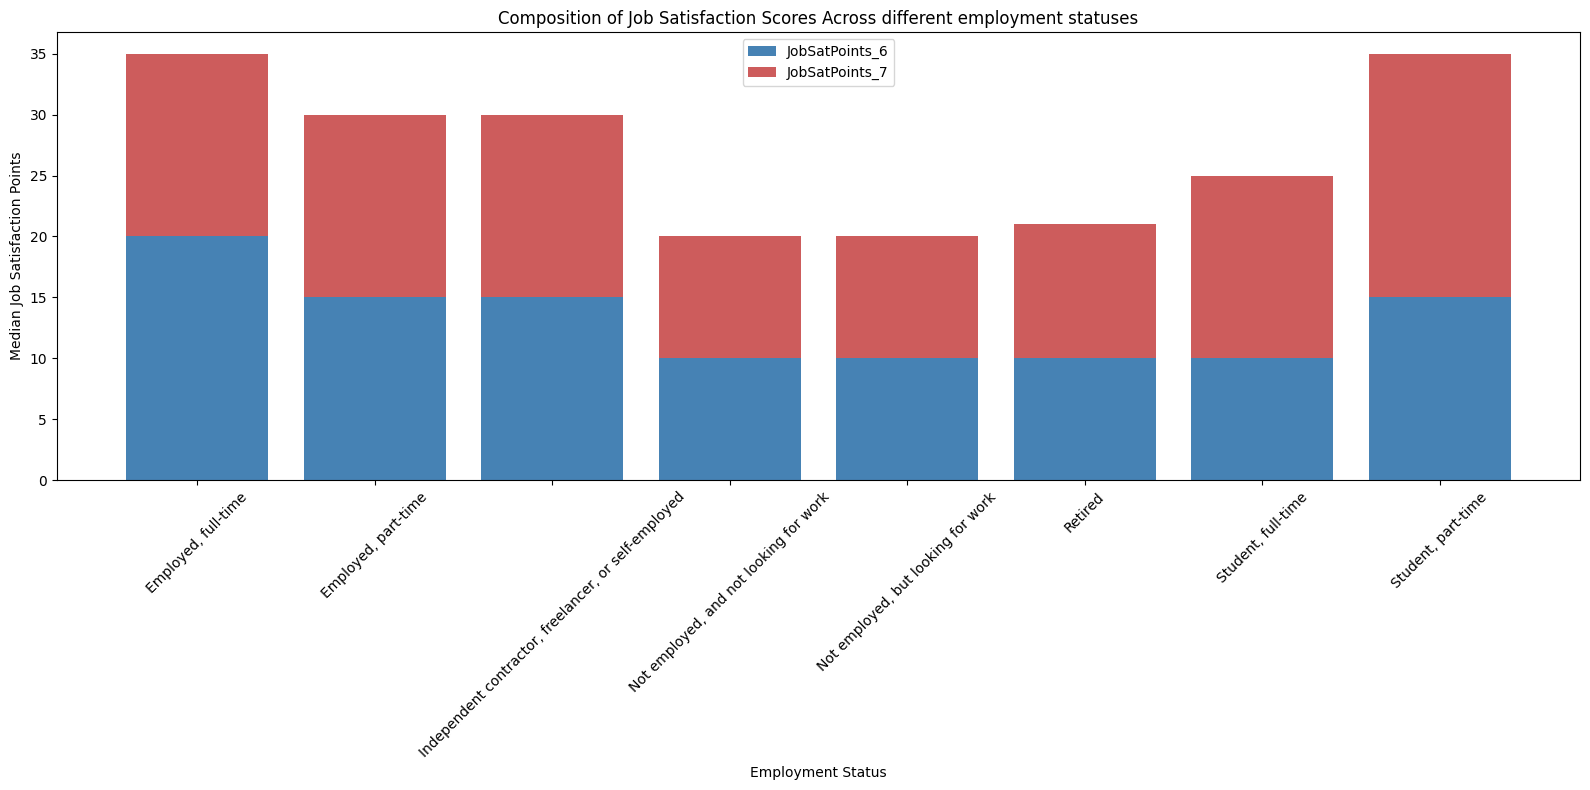

In [9]:
##Write your code here
df_emp = df.assign(employment=df['Employment'].str.split(';')).explode('employment')
df_plot = df_emp[['employment','JobSatPoints_6','JobSatPoints_7']].dropna()
grouped = df_plot.groupby('employment')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Plotting
plt.figure(figsize=(16, 8))
plt.bar(grouped['employment'], grouped['JobSatPoints_6'], label='JobSatPoints_6', color='steelblue')
plt.bar(grouped['employment'], grouped['JobSatPoints_7'], bottom=grouped['JobSatPoints_6'], label='JobSatPoints_7', color='indianred')

plt.xlabel('Employment Status')
plt.ylabel('Median Job Satisfaction Points')
plt.title('Composition of Job Satisfaction Scores Across different employment statuses')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


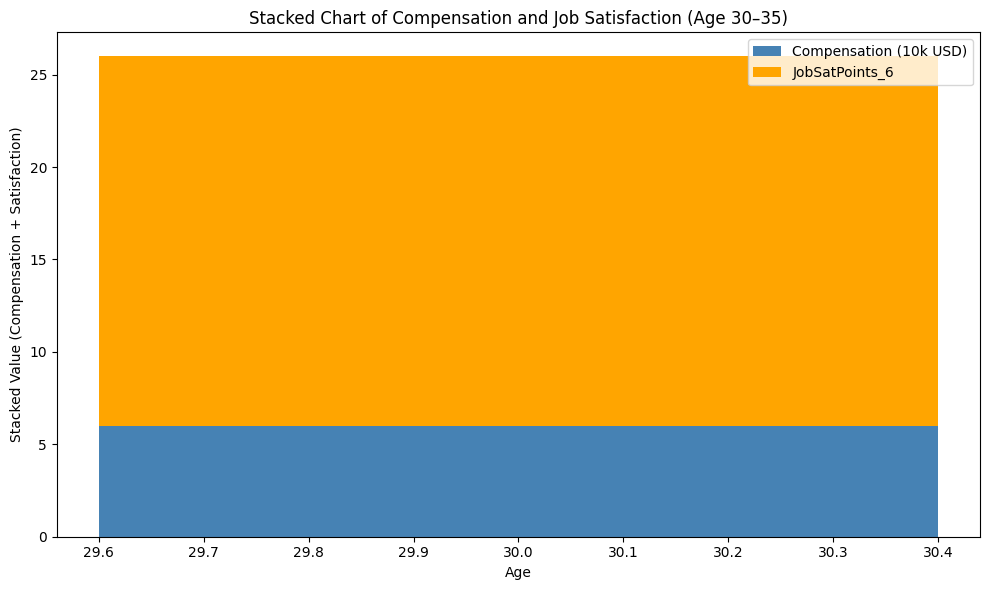

In [10]:
##Write your code here
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None,
    'NA': None
}
df['Age_num'] = df['Age'].map(age_mapping)
df_plot = df[['Age_num','JobSatPoints_6','ConvertedCompYearly']].dropna()
df_plot = df_plot[(df_plot['Age_num'] >= 30) & (df_plot['Age_num'] <= 35)]
grouped = df_plot.groupby('Age_num')[['ConvertedCompYearly', 'JobSatPoints_6']].median().reset_index()

# Normalize compensation for visualization (e.g., scale down to 10k units)
grouped['Compensation (10k USD)'] = grouped['ConvertedCompYearly'] / 10000

plt.figure(figsize=(10, 6))
plt.bar(grouped['Age_num'], grouped['Compensation (10k USD)'], label='Compensation (10k USD)', color='steelblue')
plt.bar(grouped['Age_num'], grouped['JobSatPoints_6'], bottom=grouped['Compensation (10k USD)'], label='JobSatPoints_6', color='orange')

plt.xlabel('Age')
plt.ylabel('Stacked Value (Compensation + Satisfaction)')
plt.title('Stacked Chart of Compensation and Job Satisfaction (Age 30–35)')
plt.legend()
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


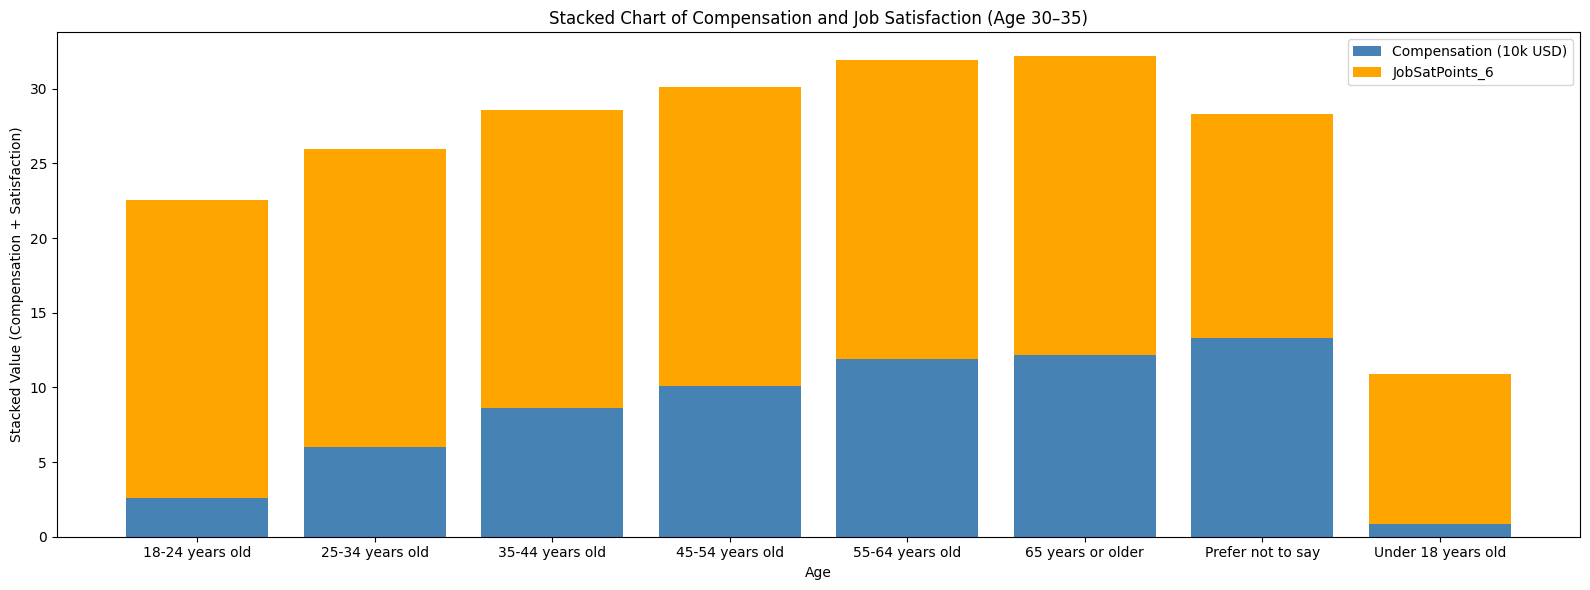

In [11]:
##Write your code here
df_plot = df[['Age','JobSatPoints_6','ConvertedCompYearly']].dropna()
grouped = df_plot.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median().reset_index()

# Normalize compensation for visualization (e.g., scale down to 10k units)
grouped['Compensation (10k USD)'] = grouped['ConvertedCompYearly'] / 10000

plt.figure(figsize=(16, 6))
plt.bar(grouped['Age'], grouped['Compensation (10k USD)'], label='Compensation (10k USD)', color='steelblue')
plt.bar(grouped['Age'], grouped['JobSatPoints_6'], bottom=grouped['Compensation (10k USD)'], label='JobSatPoints_6', color='orange')

plt.xlabel('Age')
plt.ylabel('Stacked Value (Compensation + Satisfaction)')
plt.title('Stacked Chart of Compensation and Job Satisfaction (Age 30–35)')
plt.legend()
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


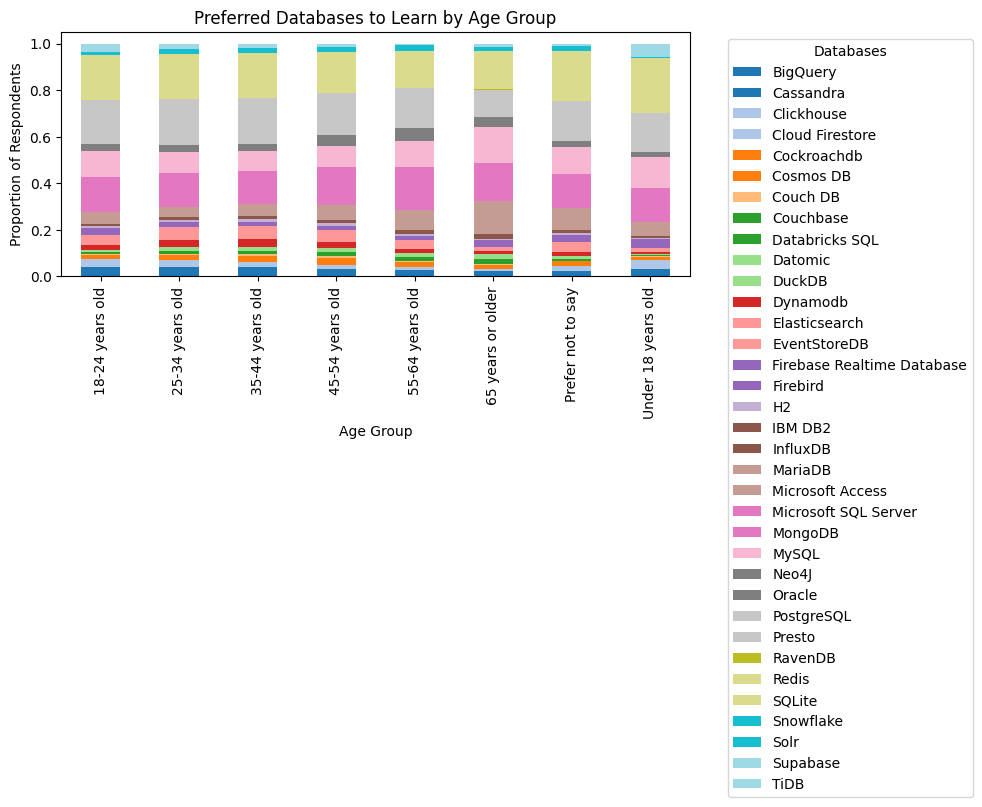

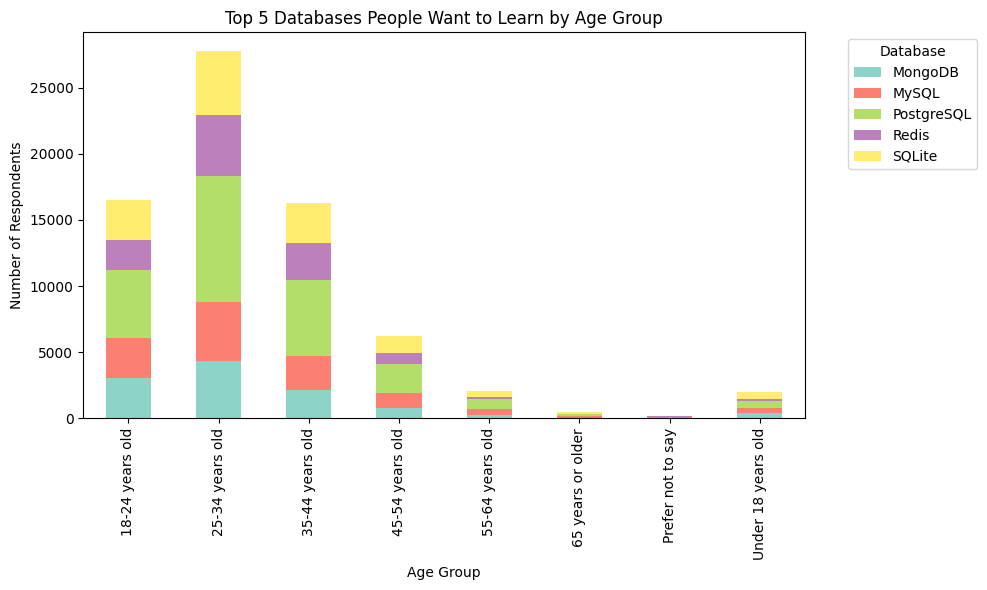

In [12]:
##Write your code here

df_db = df.assign(database=df['DatabaseWantToWorkWith'].str.split(';')).explode('database')
df_plot = df_db[['Age','database']].dropna()
grouped = df_plot.groupby(['Age', 'database']).size().unstack(fill_value=0)

grouped_prop = grouped.div(grouped.sum(axis=1), axis=0)

# Plotting
grouped_prop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.legend(title='Databases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Preferred Databases to Learn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Databases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




top5 = df_db['database'].value_counts().head(5).index
df_top5 = df_db[df_db['database'].isin(top5)]

grouped = df_top5.groupby(['Age', 'database']).size().unstack(fill_value=0)
#grouped_prop = grouped.div(grouped.sum(axis=1), axis=0)

grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

plt.title('Top 5 Databases People Want to Learn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


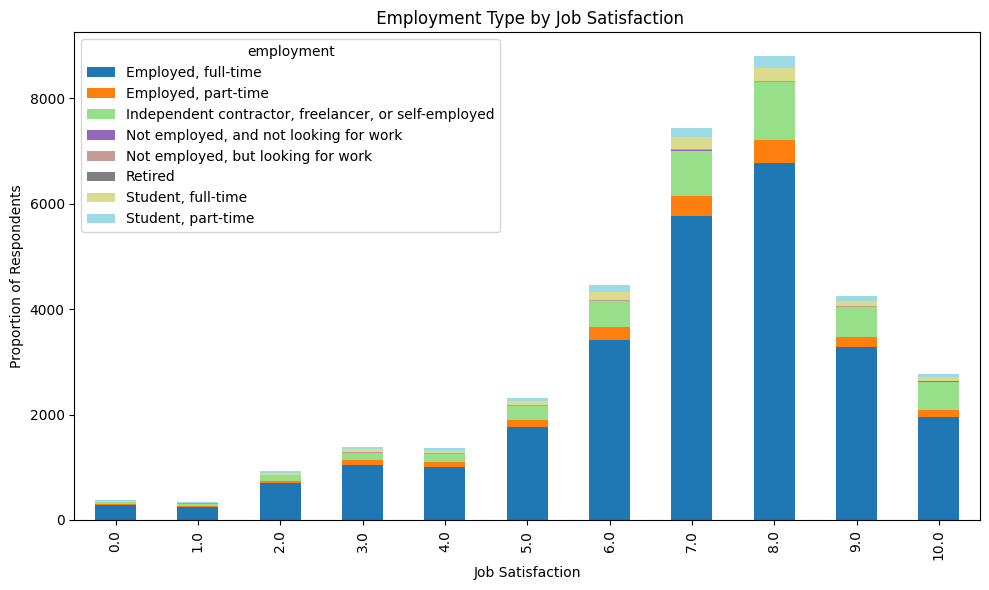

In [16]:
##Write your code here
df_emp = df.assign(employment=df['Employment'].str.split(';')).explode('employment')
df_plot = df_emp[['employment','JobSat']].dropna()
grouped = df_plot.groupby(['JobSat', 'employment']).size().unstack(fill_value=0)
#grouped_prop = grouped.div(grouped.sum(axis=1), axis=0)
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title(' Employment Type by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Proportion of Respondents')
#plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_301/1862567825.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


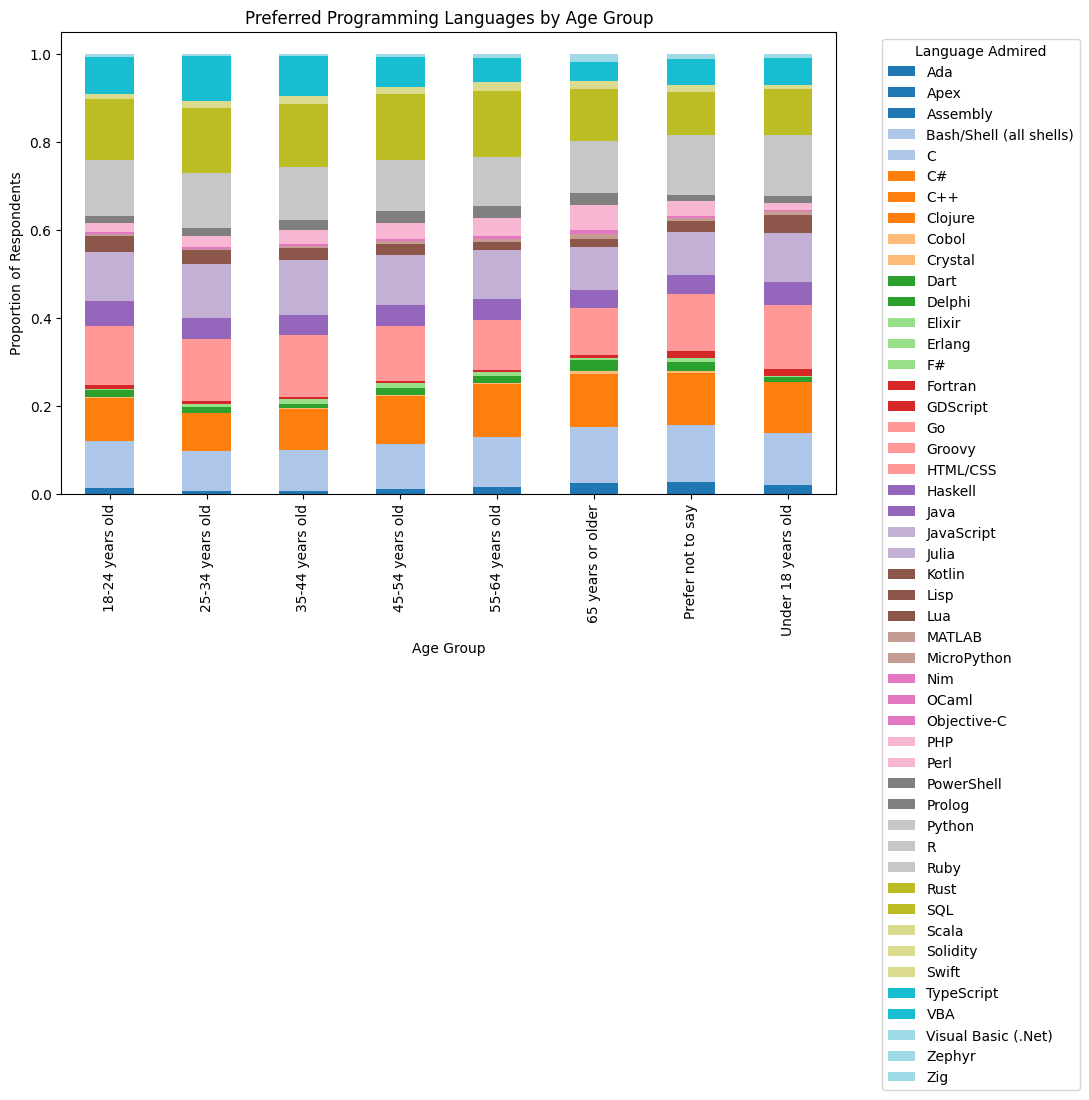

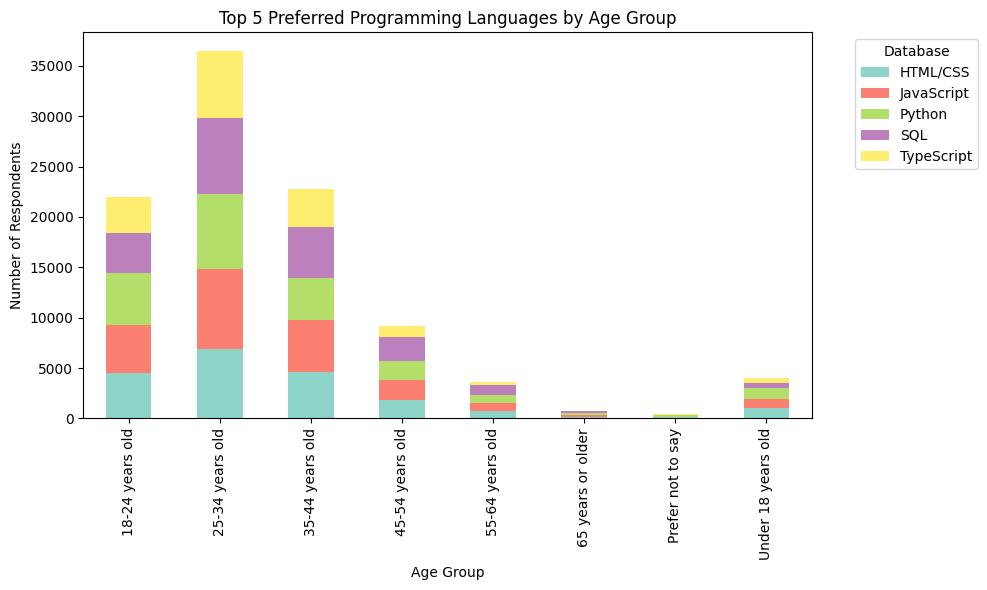

In [30]:
##Write your code here
df_admire = df.assign(admire=df['LanguageAdmired'].str.split(';')).explode('admire')
df_plot = df_admire[['Age','admire']].dropna()
grouped = df_plot.groupby(['Age', 'admire']).size().unstack(fill_value=0)

grouped_prop = grouped.div(grouped.sum(axis=1), axis=0)

# Plotting
grouped_prop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Language Admired', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




top5 = df_admire['admire'].value_counts().head(5).index
df_top5 = df_admire[df_admire['admire'].isin(top5)]

grouped = df_top5.groupby(['Age', 'admire']).size().unstack(fill_value=0)
#grouped_prop = grouped.div(grouped.sum(axis=1), axis=0)

grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

plt.title('Top 5 Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


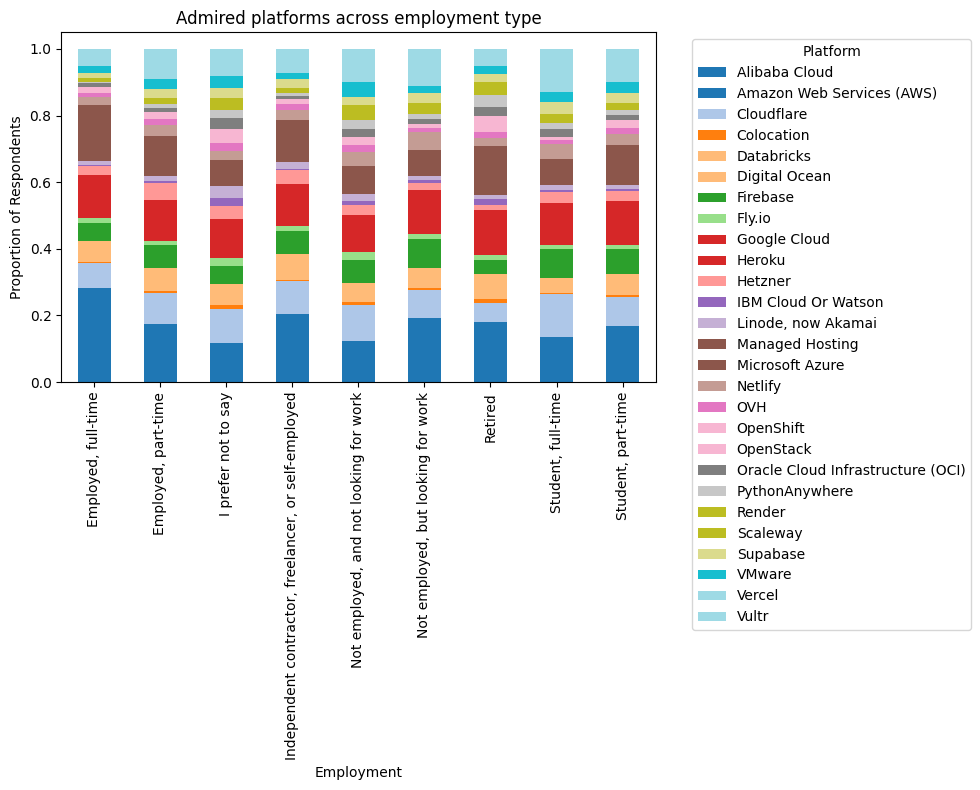

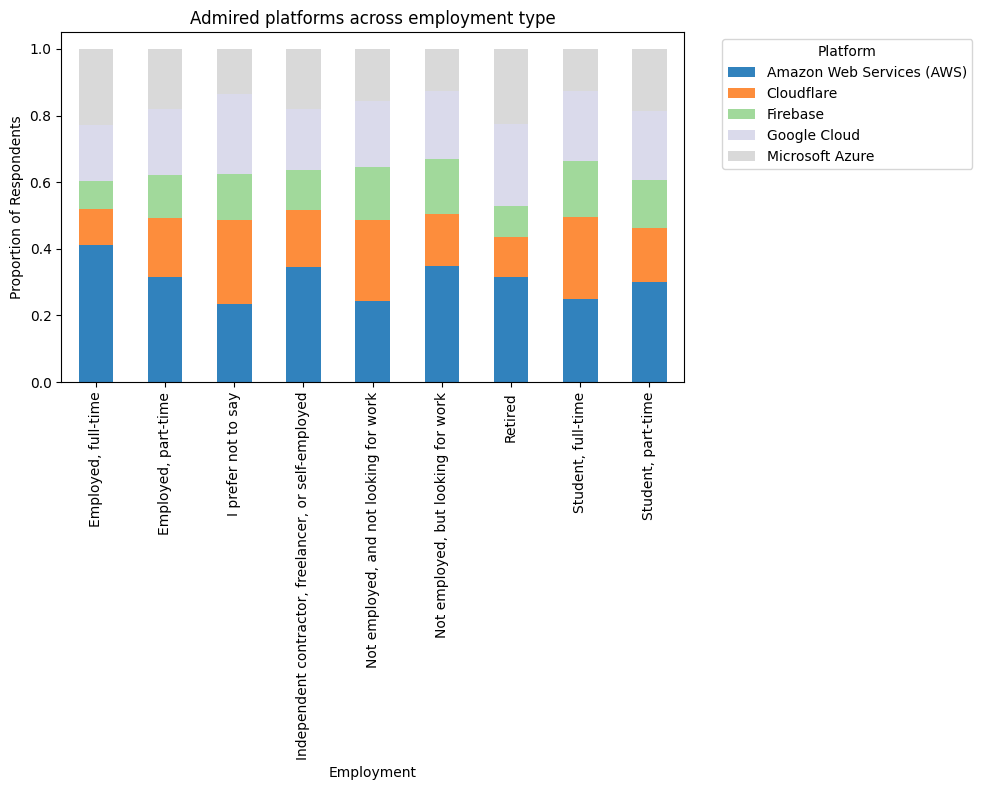

In [33]:
##Write your code here
df_tech = df.assign(
    Employment=df['Employment'].str.split(';'),
    PlatformAdmired=df['PlatformAdmired'].str.split(';')
)
df_tech = df_tech.explode('Employment').explode('PlatformAdmired')
grouped = df_tech.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)
grouped_prop = grouped.div(grouped.sum(axis=1), axis=0)
grouped_prop.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='tab20')

plt.title('Admired platforms across employment type')
plt.xlabel('Employment')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


top5 = df_tech['PlatformAdmired'].value_counts().head(5).index
df_top5 = df_tech[df_tech['PlatformAdmired'].isin(top5)]
grouped = df_top5.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)
grouped_prop = grouped.div(grouped.sum(axis=1), axis=0)
grouped_prop.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='tab20c')

plt.title('Admired platforms across employment type')
plt.xlabel('Employment')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
